In [1]:
# 영어가 아닌 단어 제거
# 소문자로 정규화 및 토큰화
# 불용어 제거
# 단어 형태를 일반화하기 위해 표제어 추출

In [2]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS, WordCloud
import nltk

In [4]:
# 제목만 읽어서 출력
all_data = pd.read_csv('riss_bigdata.csv', encoding='utf-8')
all_data


,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
1,NaN,2,Combining Human Computing and Machine Learning...,unknown,Mary Ann Leibert,2016
2,NaN,3,Big data (lost) in the cloud,"Di Martino, Beniamino; Aversa, Rocco; Cretella...",Inderscience,2014
3,NaN,4,Big Earth data: A new frontier in Earth and in...,"Guo, Huadong",John Wiley & Sons Ltd,2017
4,NaN,5,Common Big Data Challenges and How to Overcome...,unknown,Mary Ann Leibert,2014
...,...,...,...,...,...,...
95,NaN,6,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
96,NaN,7,Resting-State fMRI Functional Connectivity: Bi...,"Phinyomark, A.; Ibanez-Marcelo, E.; Petri, G.",unknown,2017
97,NaN,8,A reference architecture for big data solution...,"Geerdink, Bas",Inderscience,2015
98,NaN,9,Thermal-Aware and DVFS-Enabled Big Data Task S...,"Liu, H.; Liu, B.; Yang, L. T.; Lin, M.; Deng, ...",unknown,2018


In [5]:
all_title = all_data['제목']
all_title


0     Big Data in Healthcare: Opportunities and Chal...
1     Combining Human Computing and Machine Learning...
2                          Big data (lost) in the cloud
3     Big Earth data: A new frontier in Earth and in...
4     Common Big Data Challenges and How to Overcome...
                            ...                        
95    Big-BOE: Fusing Spanish Official Gazette with ...
96    Resting-State fMRI Functional Connectivity: Bi...
97    A reference architecture for big data solution...
98    Thermal-Aware and DVFS-Enabled Big Data Task S...
99    Call for Papers: Special Issue on Big Data in ...
Name: 제목, Length: 100, dtype: object

In [6]:
# 중복 제거
stopWords = set(stopwords.words('english'))
stopWords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
first_title = all_title[0]
first_title


'Big Data in Healthcare: Opportunities and Challenges'

In [8]:
EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(first_title))
EnWords


'Big Data in Healthcare Opportunities and Challenges'

In [9]:
EnWordsToken = word_tokenize(EnWords.lower())
EnWordsToken


['big', 'data', 'in', 'healthcare', 'opportunities', 'and', 'challenges']

In [10]:
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
EnWordsTokenStop


['big', 'data', 'healthcare', 'opportunities', 'challenges']

In [11]:
lemma = WordNetLemmatizer()
EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
EnWordsTokenStopLemma


['big', 'data', 'healthcare', 'opportunity', 'challenge']

In [12]:
# 표제어 추출
lemma = WordNetLemmatizer()
words = []
for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))  # 영어 아닌 것을 ' '으로 대체
    EnWordsToken = word_tokenize(EnWords.lower())  # 소문자로
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]  # 기본형태
    words.append(EnWordsTokenStopLemma)
words


[['big', 'data', 'healthcare', 'opportunity', 'challenge'],
 ['combining',
  'human',
  'computing',
  'machine',
  'learning',
  'make',
  'sense',
  'big',
  'aerial',
  'data',
  'disaster',
  'response'],
 ['big', 'data', 'lost', 'cloud'],
 ['big',
  'earth',
  'data',
  'new',
  'frontier',
  'earth',
  'information',
  'science'],
 ['common', 'big', 'data', 'challenge', 'overcome'],
 ['stgi',
  'spatio',
  'temporal',
  'grid',
  'index',
  'model',
  'marine',
  'big',
  'data'],
 ['tv', 'audience', 'measurement', 'big', 'data'],
 ['u',
  'army',
  'person',
  'event',
  'data',
  'environment',
  'military',
  'civilian',
  'big',
  'data',
  'enterprise'],
 ['medical',
  'school',
  'training',
  'relate',
  'practice',
  'evidence',
  'big',
  'data'],
 ['exercise',
  'exploring',
  'big',
  'data',
  'producing',
  'reliable',
  'statistical',
  'information'],
 ['gsio',
  'programmatic',
  'interface',
  'delivering',
  'big',
  'earth',
  'data',
  'service'],
 ['semantics

In [13]:
# 1개의 list로 통합
from functools import reduce
words2 = list(reduce(lambda x, y: x+y, words))
words2


['big',
 'data',
 'healthcare',
 'opportunity',
 'challenge',
 'combining',
 'human',
 'computing',
 'machine',
 'learning',
 'make',
 'sense',
 'big',
 'aerial',
 'data',
 'disaster',
 'response',
 'big',
 'data',
 'lost',
 'cloud',
 'big',
 'earth',
 'data',
 'new',
 'frontier',
 'earth',
 'information',
 'science',
 'common',
 'big',
 'data',
 'challenge',
 'overcome',
 'stgi',
 'spatio',
 'temporal',
 'grid',
 'index',
 'model',
 'marine',
 'big',
 'data',
 'tv',
 'audience',
 'measurement',
 'big',
 'data',
 'u',
 'army',
 'person',
 'event',
 'data',
 'environment',
 'military',
 'civilian',
 'big',
 'data',
 'enterprise',
 'medical',
 'school',
 'training',
 'relate',
 'practice',
 'evidence',
 'big',
 'data',
 'exercise',
 'exploring',
 'big',
 'data',
 'producing',
 'reliable',
 'statistical',
 'information',
 'gsio',
 'programmatic',
 'interface',
 'delivering',
 'big',
 'earth',
 'data',
 'service',
 'semantics',
 'way',
 'semantic',
 'web',
 'open',
 'science',
 'big',
 'ea

In [14]:
# 단어 빈도수 구하기
from collections import Counter
count = Counter(words2)
count


Counter({'big': 104,
         'data': 116,
         'healthcare': 2,
         'opportunity': 2,
         'challenge': 6,
         'combining': 1,
         'human': 4,
         'computing': 2,
         'machine': 3,
         'learning': 3,
         'make': 1,
         'sense': 1,
         'aerial': 1,
         'disaster': 1,
         'response': 2,
         'lost': 2,
         'cloud': 3,
         'earth': 18,
         'new': 5,
         'frontier': 2,
         'information': 3,
         'science': 6,
         'common': 1,
         'overcome': 1,
         'stgi': 1,
         'spatio': 1,
         'temporal': 1,
         'grid': 1,
         'index': 1,
         'model': 5,
         'marine': 1,
         'tv': 1,
         'audience': 1,
         'measurement': 2,
         'u': 1,
         'army': 1,
         'person': 1,
         'event': 1,
         'environment': 1,
         'military': 1,
         'civilian': 1,
         'enterprise': 1,
         'medical': 1,
         'school': 1,
   

In [15]:
# 상위 50개 단어만 추출
count.most_common(50)


[('data', 116),
 ('big', 104),
 ('earth', 18),
 ('analytics', 16),
 ('based', 9),
 ('analysis', 8),
 ('issue', 7),
 ('challenge', 6),
 ('science', 6),
 ('call', 6),
 ('special', 6),
 ('paper', 6),
 ('new', 5),
 ('model', 5),
 ('using', 5),
 ('health', 5),
 ('human', 4),
 ('research', 4),
 ('processing', 4),
 ('approach', 4),
 ('perspective', 4),
 ('market', 4),
 ('review', 4),
 ('machine', 3),
 ('learning', 3),
 ('cloud', 3),
 ('information', 3),
 ('web', 3),
 ('scientific', 3),
 ('classification', 3),
 ('computational', 3),
 ('propaganda', 3),
 ('political', 3),
 ('search', 3),
 ('global', 3),
 ('education', 3),
 ('survey', 3),
 ('driven', 3),
 ('efficient', 3),
 ('multi', 3),
 ('predictive', 3),
 ('robotics', 3),
 ('system', 3),
 ('solution', 3),
 ('healthcare', 2),
 ('opportunity', 2),
 ('computing', 2),
 ('response', 2),
 ('lost', 2),
 ('frontier', 2)]

In [22]:
word_count = dict()
for tag, counts in count.most_common(50):
    # print(tag, counts)
    if((len(str(tag))) > 1 and counts > 2):
        word_count[tag] = counts
word_count


{'data': 116,
 'big': 104,
 'earth': 18,
 'analytics': 16,
 'based': 9,
 'analysis': 8,
 'issue': 7,
 'challenge': 6,
 'science': 6,
 'call': 6,
 'special': 6,
 'paper': 6,
 'new': 5,
 'model': 5,
 'using': 5,
 'health': 5,
 'human': 4,
 'research': 4,
 'processing': 4,
 'approach': 4,
 'perspective': 4,
 'market': 4,
 'review': 4,
 'machine': 3,
 'learning': 3,
 'cloud': 3,
 'information': 3,
 'web': 3,
 'scientific': 3,
 'classification': 3,
 'computational': 3,
 'propaganda': 3,
 'political': 3,
 'search': 3,
 'global': 3,
 'education': 3,
 'survey': 3,
 'driven': 3,
 'efficient': 3,
 'multi': 3,
 'predictive': 3,
 'robotics': 3,
 'system': 3,
 'solution': 3}

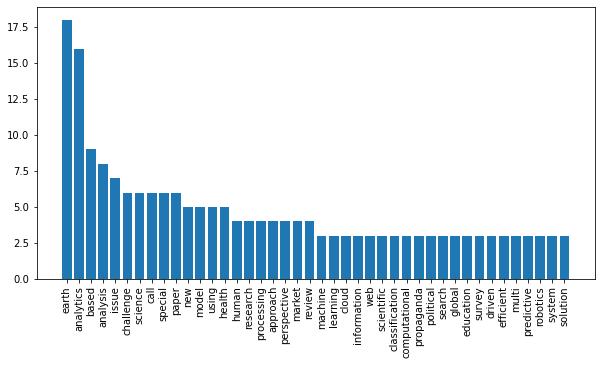

In [30]:
# 히스토그램 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='90')
plt.show()


In [ ]:
del word_count['big']
del word_count['data']


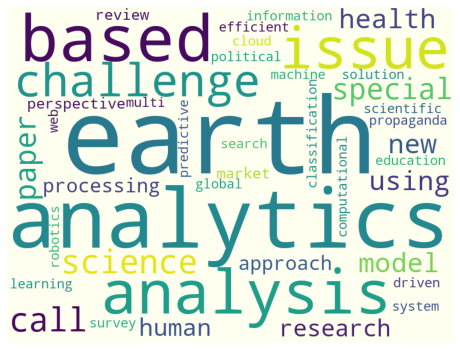

In [26]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory',
               stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

f = plt.figure(figsize=(8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()
f.savefig('engword.png')
